# Baby Name Analysis

In this EDA I will:
- Clean the Data
- Visualize Distribution of Variables
- Check Top Names

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# load and view a sample of the df
df = pd.read_csv('Data/Popular_Baby_Names.csv')
df.sample(10) 

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
56710,2014,MALE,ASIAN AND PACIFIC ISLANDER,Max,22,46
1033,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,JENNIFER,18,30
56187,2014,FEMALE,WHITE NON HISPANIC,Adelina,11,85
26758,2011,FEMALE,WHITE NON HISPANIC,MIA,116,15
48560,2018,MALE,WHITE NON HISPANIC,Lev,28,83
23151,2014,MALE,ASIAN AND PACIFIC ISLANDER,Rayyan,24,44
18832,2012,FEMALE,WHITE NON HISP,RIVKA,96,24
45099,2013,MALE,HISPANIC,Nelson,16,89
46764,2014,MALE,ASIAN AND PACIFIC ISLANDER,Syed,20,48
33135,2015,FEMALE,WHITE NON HISPANIC,Logan,11,82


In [4]:
df.shape

(57582, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57582 entries, 0 to 57581
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year of Birth       57582 non-null  int64 
 1   Gender              57582 non-null  object
 2   Ethnicity           57582 non-null  object
 3   Child's First Name  57582 non-null  object
 4   Count               57582 non-null  int64 
 5   Rank                57582 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 2.6+ MB


In [6]:
df.isna().sum().sum() #zero nulls

0

In [7]:
# got rid of the apostrophe
df = df.rename(columns={"Child's First Name": 'Name'}) 

In [8]:
# changed the names to lower case, in case of duplicates of upper/lowercase
df['Name'] = df['Name'].str.lower()

In [9]:
# quite a few duplicated rows
df.duplicated().sum()

39529

Dropped the duplicated rows

In [10]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(18053, 6)

From the table below we can see:
- Years range from 2011-2019
- Count ranges from 10-426 (for all years)
- Rank ranges from 1 - 78 (for all years)

In [12]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year of Birth,18053.0,2014.980059,2.559148,2011.0,2013.0,2015.0,2017.0,2019.0
Count,18053.0,33.573589,38.672649,10.0,13.0,20.0,35.0,426.0
Rank,18053.0,56.274193,25.503284,1.0,37.0,57.0,78.0,102.0


Checking the unique values for the variables. Noticed that the ethnicities need to be replaced. It is clear that `WHITE NON HISP` is equal to `WHITE NON HISPANIC` and other ethnicities have an abbreviated version as well. Also note there are 1938 unique names in this df. 

In [13]:
print(f"Unique years: {df['Year of Birth'].unique()}\n")
print(f"Unique Ethnicities: {df['Ethnicity'].unique()}\n")
print(f"Unique Genders: {df['Gender'].unique()}\n")
print(f"Count of Unique Names: {len(df['Name'].unique())}")


Unique years: [2011 2013 2012 2014 2017 2018 2016 2015 2019]

Unique Ethnicities: ['HISPANIC' 'WHITE NON HISPANIC' 'ASIAN AND PACIFIC ISLANDER'
 'BLACK NON HISPANIC' 'ASIAN AND PACI' 'BLACK NON HISP' 'WHITE NON HISP']

Unique Genders: ['FEMALE' 'MALE']

Count of Unique Names: 1938


In [14]:
# Replace abbreviated ethnicities
df['Ethnicity'] = df['Ethnicity'].replace({
    'ASIAN AND PACI': 'ASIAN AND PACIFIC ISLANDER',
    'WHITE NON HISP': 'WHITE NON HISPANIC',
    'BLACK NON HISP' : 'BLACK NON HISPANIC',
    
})

In [15]:
# confirming replacement worked
df['Ethnicity'].unique()

array(['HISPANIC', 'WHITE NON HISPANIC', 'ASIAN AND PACIFIC ISLANDER',
       'BLACK NON HISPANIC'], dtype=object)


In this dataset, it's important to distinguish between the count of data points (individual rows in the dataset) and the volume of data these points represent. Each data point is an instance of a given name, but it is associated with a `Count` value that indicates how many times that particular name was given in a specific year, for a specific gender and ethnicity. Therefore, the 'Count' column amplifies the meaning of each data point, as it reflects the prevalence of that name for a particular group and year.

In the visualizations that follow, I will illustrate both these aspects. One set of visualizations will show the distribution of data points, the other set will depict the total 'Count' values for these categories, which actually represents the frequency of these names being given in the real world. 

In [16]:
print(df['Count'].sum())
print(df.shape[0])

606104
18053


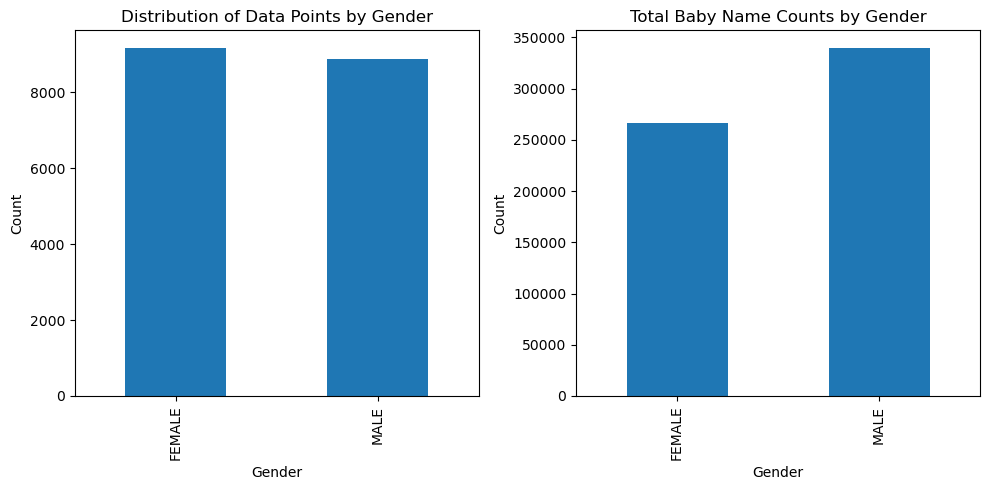

In [17]:
# plot dist. of data by gender
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Data Points by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# plot total no. of baby name count by gender
plt.subplot(1,2,2)
df.groupby('Gender')['Count'].sum().plot(kind='bar')
plt.title('Total Baby Name Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



Although in the dataset there is very equal representation of both female and male, it appears the sampling method has a male bias.

In [18]:
print('Normalized Data Points by Gender')
print(df['Gender'].value_counts(normalize=True))
print('-'*120)
print('Normalized Total Baby Name Count by Gender' )
print((df.groupby('Gender')['Count'].sum()/df['Count'].sum()).sort_values(ascending=False))

Normalized Data Points by Gender
FEMALE    0.508447
MALE      0.491553
Name: Gender, dtype: float64
------------------------------------------------------------------------------------------------------------------------
Normalized Total Baby Name Count by Gender
Gender
MALE      0.560732
FEMALE    0.439268
Name: Count, dtype: float64


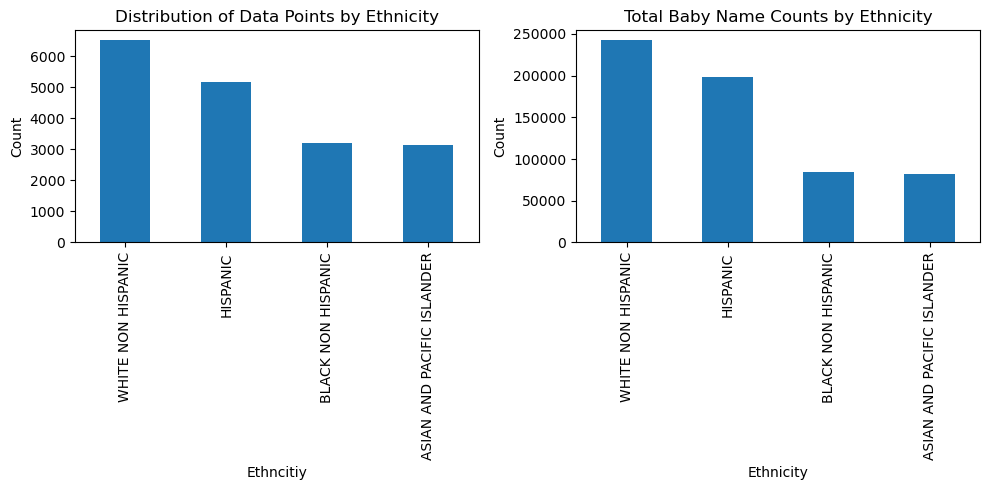

In [19]:
# plot data points per each ethnicithity
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df['Ethnicity'].value_counts().plot(kind='bar')
plt.title('Distribution of Data Points by Ethnicity')
plt.ylabel('Count')
plt.xlabel('Ethncitiy')
# plt.xticks(rotation =45)

# plot total baby names / eth.
plt.subplot(1,2,2)
df.groupby('Ethnicity')['Count'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Baby Name Counts by Ethnicity')
plt.ylabel('Count')
plt.xlabel('Ethnicity')
plt.tight_layout()
plt.show()



Below shows the normalized versions of the counts of baby names and the number of rows for each ethnicity. White has the majority in each, but the `black non hispanic` and `asain and pacific islander` are even more underrepresented in total number of baby names.

In [20]:
print('Normalized Data Points by Ethnicity')
print(df['Ethnicity'].value_counts(normalize=True))
print('-'*120)
print('Normalized Total Baby Name Count by Ethnicity' )
print((df.groupby('Ethnicity')['Count'].sum()/df['Count'].sum()).sort_values(ascending=False))

Normalized Data Points by Ethnicity
WHITE NON HISPANIC            0.360771
HISPANIC                      0.286933
BLACK NON HISPANIC            0.177644
ASIAN AND PACIFIC ISLANDER    0.174652
Name: Ethnicity, dtype: float64
------------------------------------------------------------------------------------------------------------------------
Normalized Total Baby Name Count by Ethnicity
Ethnicity
WHITE NON HISPANIC            0.399497
HISPANIC                      0.326262
BLACK NON HISPANIC            0.138876
ASIAN AND PACIFIC ISLANDER    0.135365
Name: Count, dtype: float64


Each year has relatively equal number of baby names and rows in the dataframe.

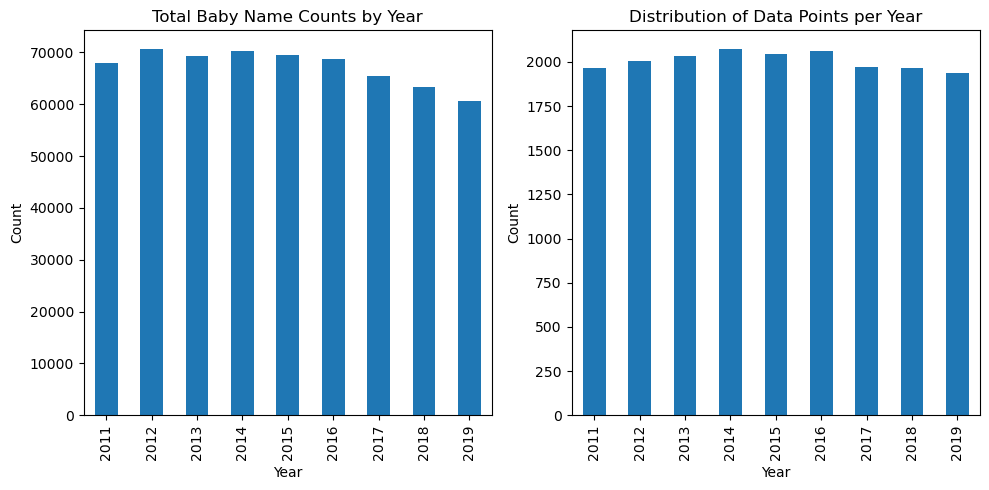

In [21]:
# plot count of names per year
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df.groupby('Year of Birth')['Count'].sum().plot(kind='bar')
plt.title('Total Baby Name Counts by Year')
plt.xlabel('Year')
plt.ylabel('Count')


plt.subplot(1,2,2)
# Plot rows per year in df
df['Year of Birth'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Data Points per Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

Here we can see the list of names that belong to all four ethnicities in this dataset, regardless of year.

In [22]:
# multi ethnic names
multi_ethnic_names = df.groupby(['Name','Ethnicity']).size().groupby('Name').filter(lambda x: len(x) == 4).reset_index()['Name'].unique()
print(multi_ethnic_names)
print(f"\n{len(multi_ethnic_names)} names are represented in all four ethnicities. ")

['aaron' 'abigail' 'adam' 'adrian' 'aidan' 'aiden' 'aisha' 'alex' 'alexa'
 'alexander' 'alexandra' 'alexis' 'alicia' 'alyssa' 'amanda' 'amara'
 'amelia' 'amina' 'amir' 'amira' 'andrew' 'angelina' 'annabelle' 'anthony'
 'aria' 'ariana' 'arianna' 'ariel' 'ariella' 'arya' 'asher' 'ashley'
 'ashton' 'athena' 'audrey' 'aurora' 'austin' 'ava' 'avery' 'ayden'
 'bella' 'benjamin' 'bradley' 'brandon' 'brayden' 'brian' 'brianna'
 'bryan' 'caleb' 'cameron' 'carter' 'celine' 'charles' 'charlotte' 'chase'
 'chelsea' 'chloe' 'chris' 'christian' 'christina' 'christopher' 'connor'
 'daniel' 'david' 'devin' 'dylan' 'edward' 'eli' 'eliana' 'elias' 'elijah'
 'elizabeth' 'ella' 'emily' 'emma' 'emmanuel' 'eric' 'esther' 'ethan'
 'eva' 'evan' 'faith' 'fatima' 'gabriel' 'gabriella' 'gavin' 'george'
 'gia' 'gianna' 'giselle' 'grace' 'grayson' 'hailey' 'hannah' 'henry'
 'hunter' 'ian' 'isaac' 'isabella' 'isabelle' 'isaiah' 'jace' 'jackson'
 'jacob' 'james' 'jasmine' 'jason' 'jayden' 'jeremy' 'jessica' 'john'
 

Below are the 36 unisex names.

In [23]:
# unisex names
name_gender_groups = df.groupby(['Name', 'Gender']).size()
unisex_names = name_gender_groups.groupby('Name').filter(lambda x: len(x)==2).reset_index()['Name'].unique()
print(unisex_names)
print(f'\n {len(unisex_names)} Unisex Names.')

['alexis' 'angel' 'ariel' 'avery' 'blake' 'cameron' 'charlie' 'dylan'
 'eden' 'elliott' 'emerson' 'finley' 'jamie' 'jaylin' 'jia' 'jordan' 'kai'
 'logan' 'milan' 'nana' 'parker' 'peyton' 'phoenix' 'quinn' 'remy' 'riley'
 'rowan' 'royal' 'ryan' 'sage' 'shea' 'shiloh' 'skyler' 'taylor' 'tenzin'
 'yael']

 36 Unisex Names.


A look into the correlation between rank and count. As expected, there is a negative correlation (-0.58), as count goes up rank goes down.

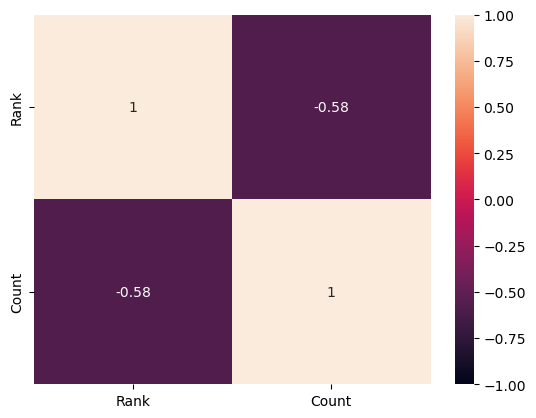

In [24]:
corr_df = df[['Rank','Count']].corr()
sns.heatmap(corr_df, annot=True, vmin=-1,vmax=1)
plt.show()


Below we take a look at the distributions of rank and count in general, and for each ethnicity. They are all extremely skewed, meaning that certain names are quite popular then there is quick drop off for less popular names. 

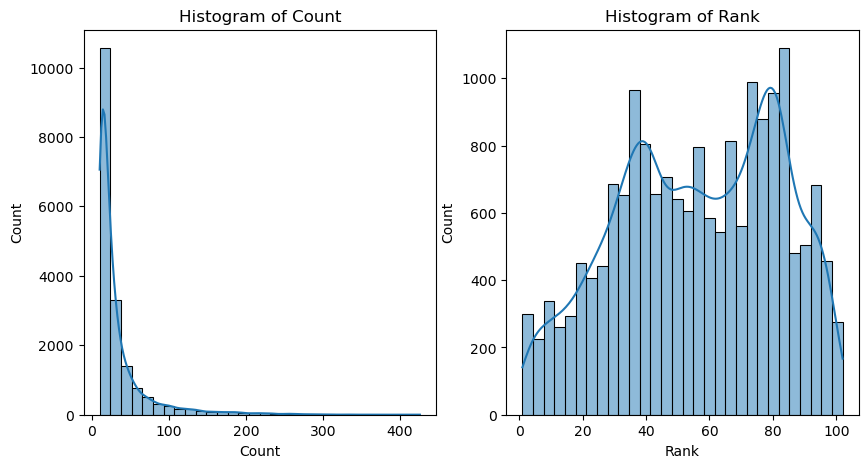

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# For 'Count' column
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Count'], bins=30, kde=True)
plt.title('Histogram of Count')

# rank
plt.subplot(1, 2, 2)
sns.histplot(df['Rank'], bins=30, kde=True)
plt.title('Histogram of Rank')
plt.show()



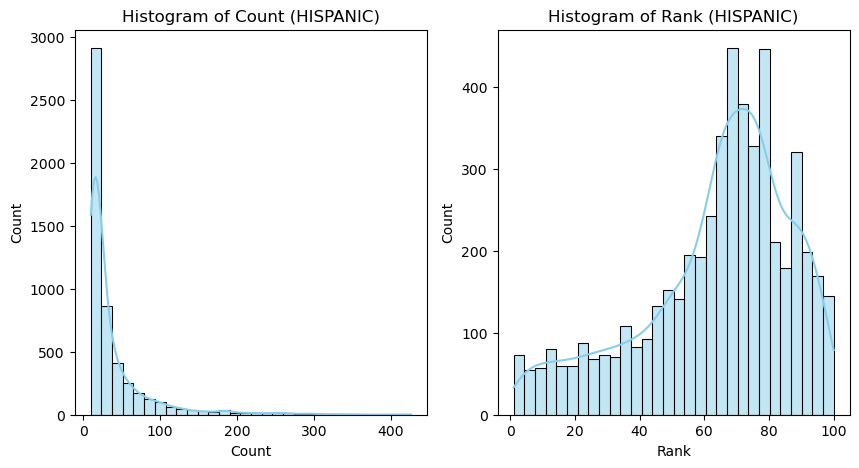

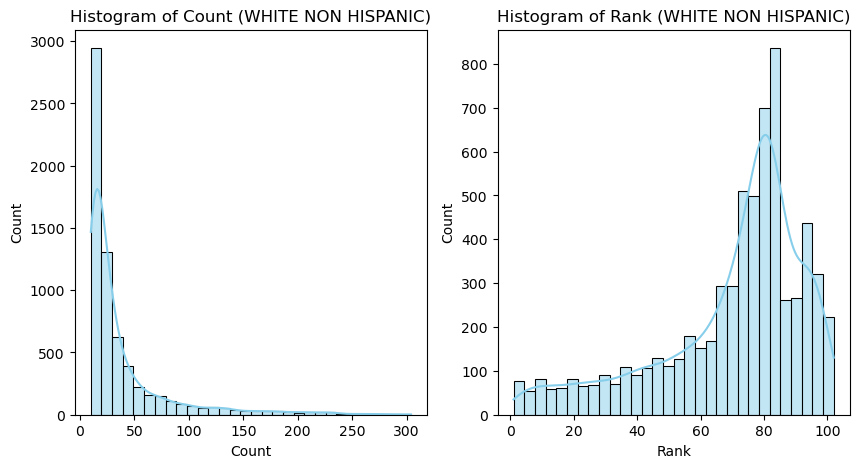

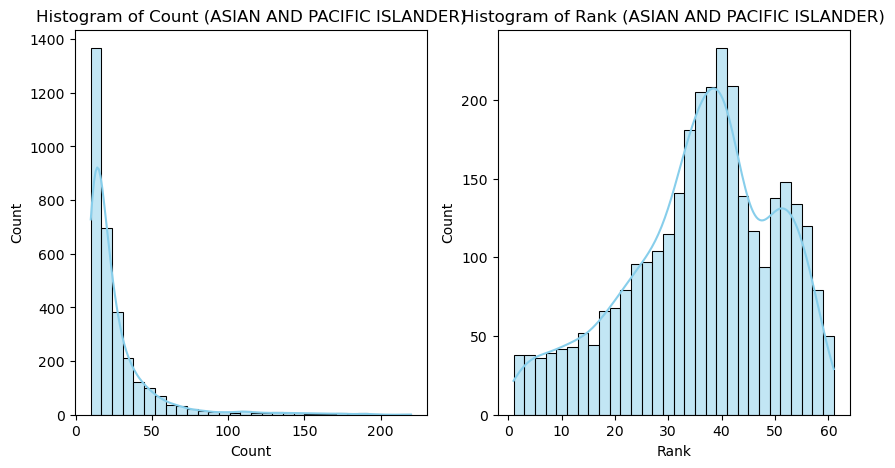

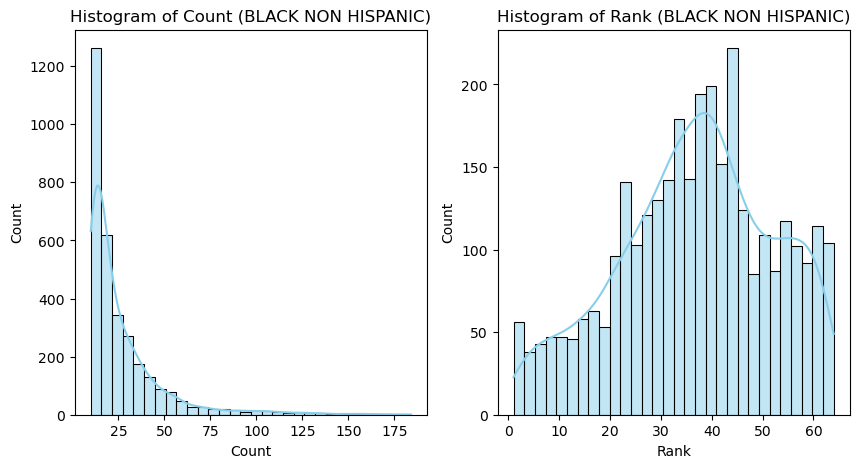

In [26]:
# List of unique ethnicities
ethnicities = df['Ethnicity'].unique()

# For each ethnicity
for ethnicity in ethnicities:
    subset = df[df['Ethnicity'] == ethnicity]
    
    # Histograms
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(subset['Count'], bins=30, color='skyblue', kde=True)
    plt.title(f'Histogram of Count ({ethnicity})')
    
    plt.subplot(1, 2, 2)
    sns.histplot(subset['Rank'], bins=30, color='skyblue', kde=True)
    plt.title(f'Histogram of Rank ({ethnicity})')
    plt.show()
    


# Name Popularity

### Top Names 

Below are the 20 most popular names by count (ignoring gender). 

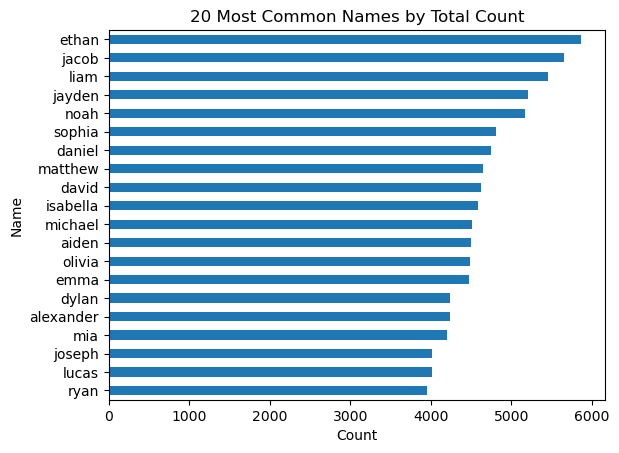

In [27]:
# plot 20 most common names by count
df.groupby('Name')['Count'].sum().sort_values(ascending=True).tail(20).plot(kind='barh')
plt.title('20 Most Common Names by Total Count')
plt.xlabel('Count')
plt.show()

Here are the top 10 male and female names by count.

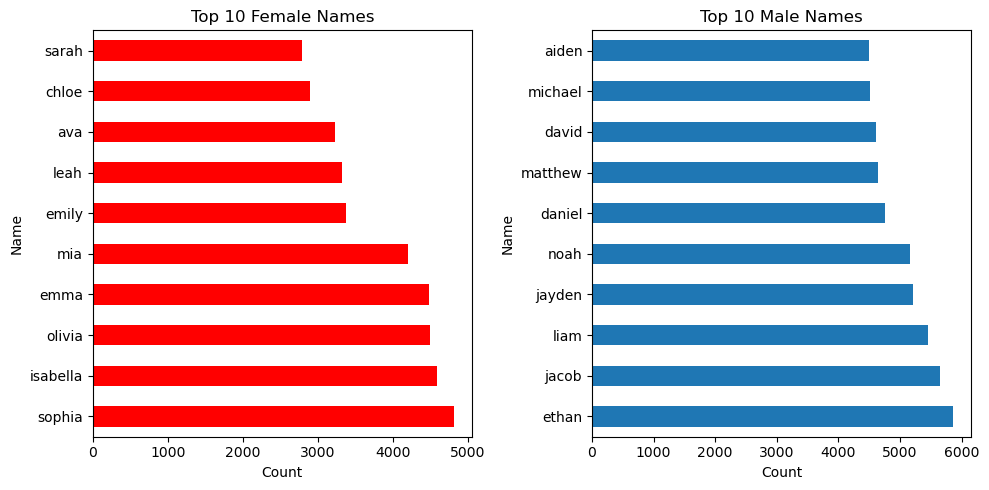

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

# top female names
df[df['Gender'] == 'FEMALE'].groupby(['Name'])['Count'].sum().sort_values(ascending=False).head(10).plot(kind='barh',color='red')
plt.title('Top 10 Female Names')
plt.ylabel('Name')
plt.xlabel('Count')

# top male names
plt.subplot(1,2,2)
df[df['Gender'] == 'MALE'].groupby(['Name'])['Count'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Male Names')
plt.ylabel('Name')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

Next is perhaps a total graph overload, but it shows the top 5 names each year by ethnicity and gender.

2011 Top Names by Ethnicity and Gender
------------------------------------------------------------------------------------------------------------------------


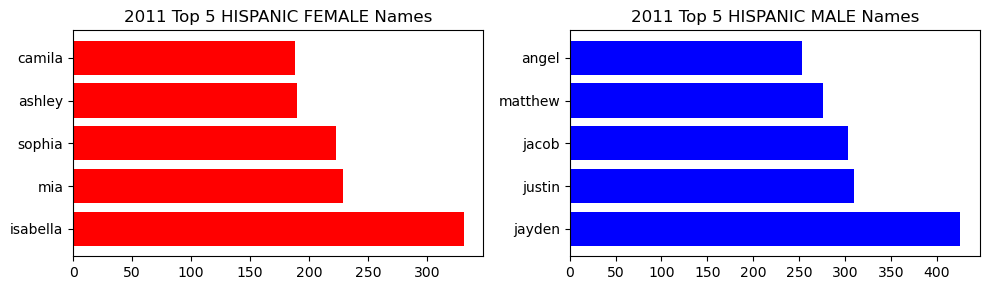

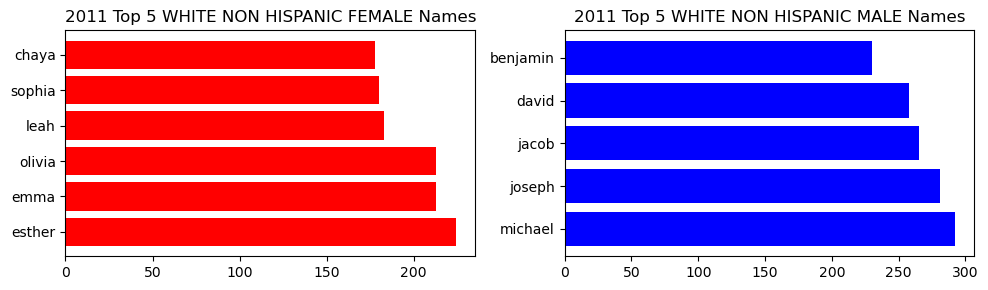

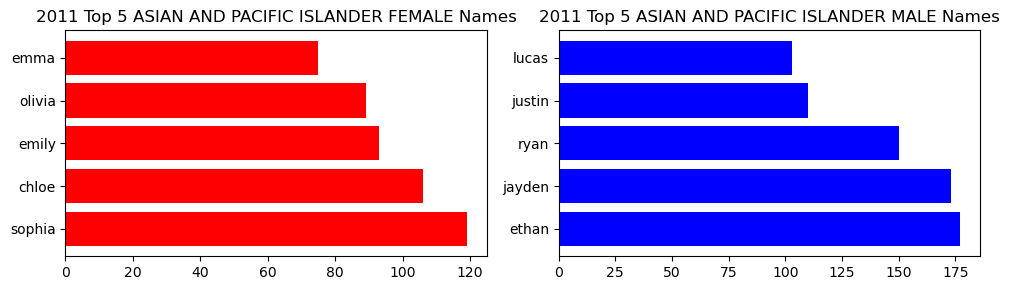

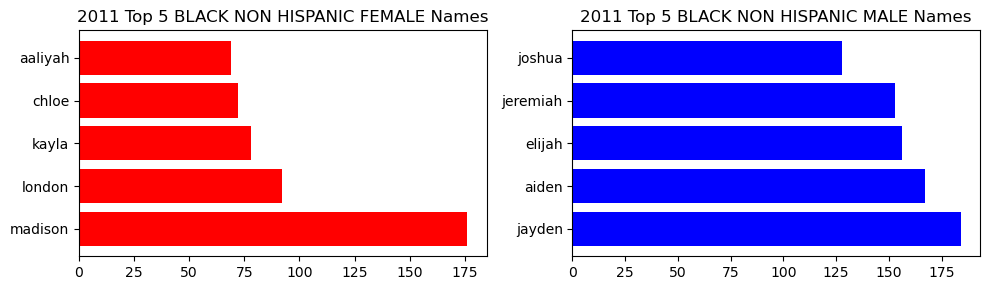

2012 Top Names by Ethnicity and Gender
------------------------------------------------------------------------------------------------------------------------


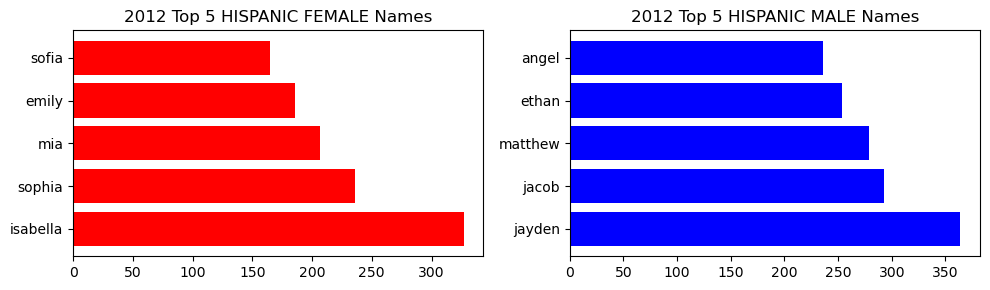

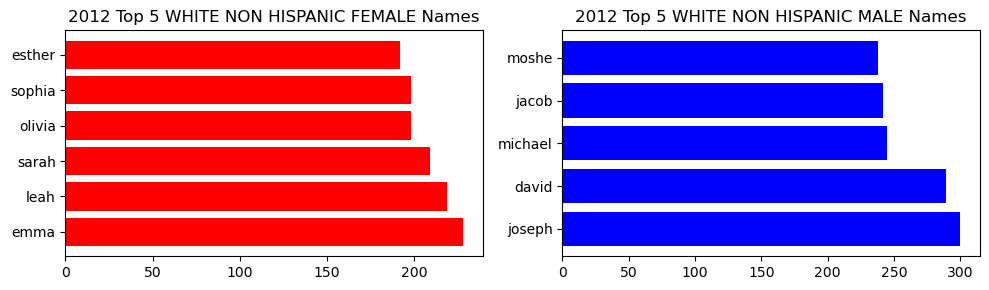

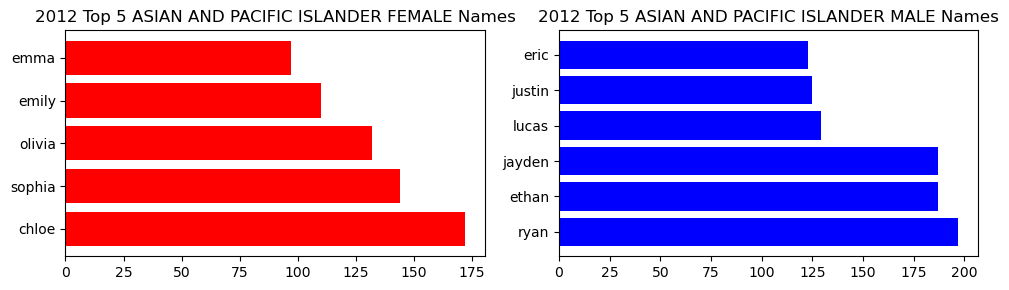

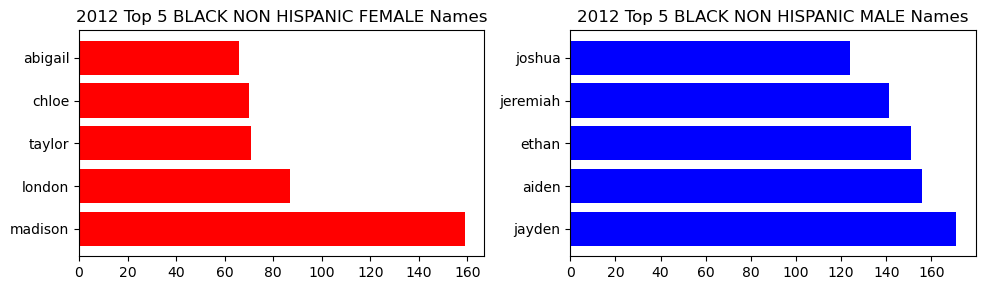

2013 Top Names by Ethnicity and Gender
------------------------------------------------------------------------------------------------------------------------


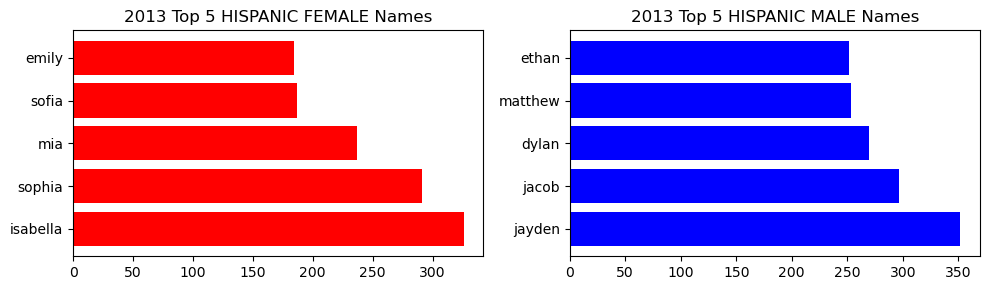

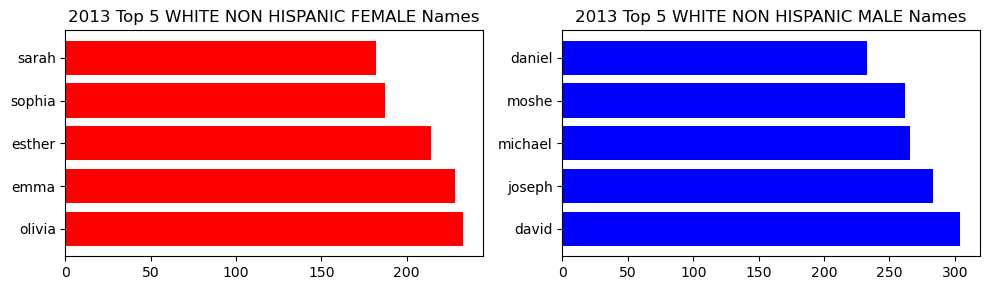

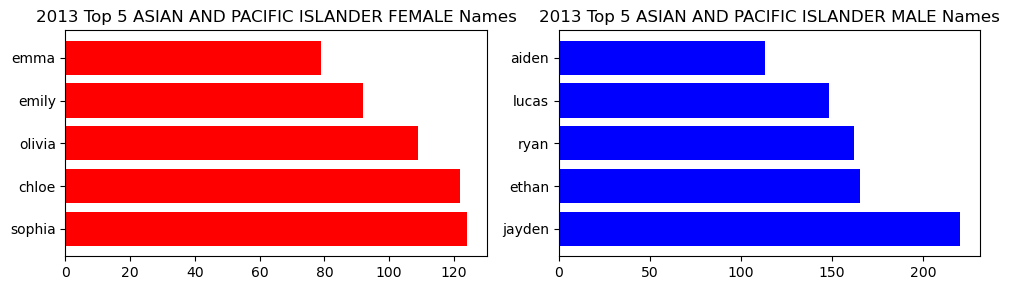

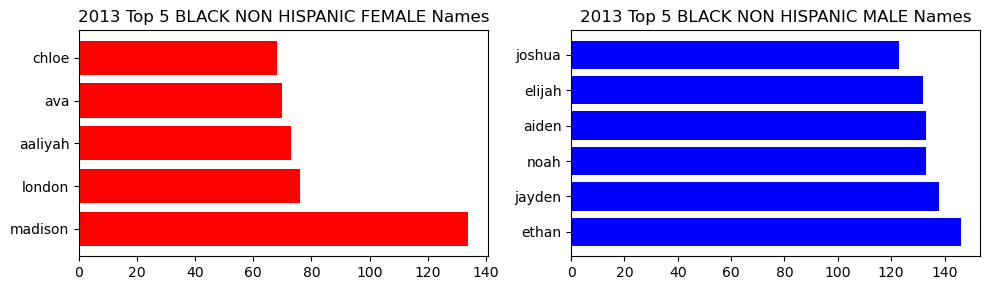

2014 Top Names by Ethnicity and Gender
------------------------------------------------------------------------------------------------------------------------


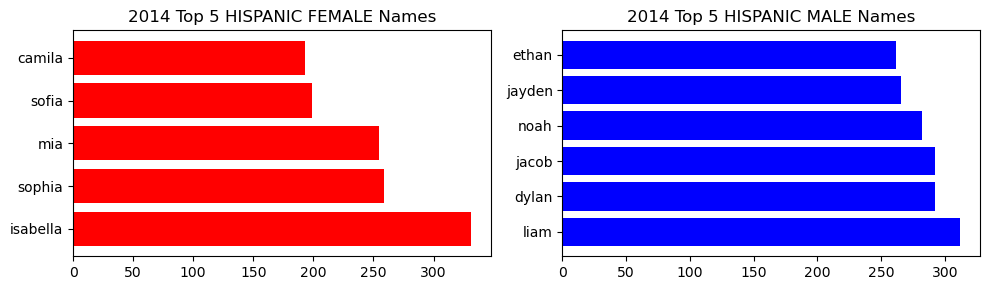

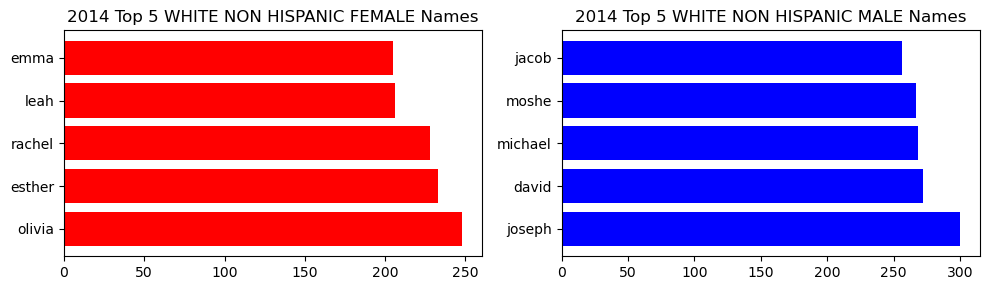

In [ ]:
# plot 10 most common names by gender
years = np.sort(df['Year of Birth'].unique())
ethnicities = df['Ethnicity'].unique()
genders = df['Gender'].unique()
top_ranks = range(1,6)

for year in years:
    print(f'{year} Top Names by Ethnicity and Gender')
    print('-'*120)
    for ethnicity in ethnicities:
        plt.figure(figsize=(10,3))
        for gender in genders:
            color = 'blue'
            if gender == 'FEMALE':
                color = 'red'
            
            filtered_df = df[(df['Rank'].isin(top_ranks)) & (df['Year of Birth'] == year) \
                             & (df['Ethnicity'] == ethnicity) & (df['Gender'] == gender)].sort_values('Rank')
            
            plt.subplot(1,2,genders.tolist().index(gender)+1)
           
            plt.barh(filtered_df['Name'],filtered_df['Count'],color=color)
            plt.title(f'{year} Top 5 {ethnicity} {gender} Names')
        plt.tight_layout()
        plt.show()

            
    

This is my first submission to Kaggle! Any feedback/constructive critism/ideas would all be appreciated! 